<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Define-Mapping-Dictionaries" data-toc-modified-id="Define-Mapping-Dictionaries-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Define Mapping Dictionaries</a></span></li><li><span><a href="#Define-the-Import-Function" data-toc-modified-id="Define-the-Import-Function-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Define the Import Function</a></span></li><li><span><a href="#Confirm-the-imported-data" data-toc-modified-id="Confirm-the-imported-data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Confirm the imported data</a></span></li></ul></li></ul></li><li><span><a href="#Distribution-of-Names" data-toc-modified-id="Distribution-of-Names-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribution of Names</a></span><ul class="toc-item"><li><span><a href="#Baby-Names-and-the-Power-Law-Distribution" data-toc-modified-id="Baby-Names-and-the-Power-Law-Distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baby Names and the <span style="color:#ff6347">Power Law Distribution</span></a></span></li></ul></li><li><span><a href="#US-Birth-Rate-Analysis" data-toc-modified-id="US-Birth-Rate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>US Birth Rate Analysis</a></span><ul class="toc-item"><li><span><a href="#Overall-Birth-Trend" data-toc-modified-id="Overall-Birth-Trend-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overall Birth Trend</a></span></li><li><span><a href="#States-Ranking" data-toc-modified-id="States-Ranking-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>States Ranking</a></span></li><li><span><a href="#Noticable-State-Birth-Rate-Changes-Throughout-the-Years" data-toc-modified-id="Noticable-State-Birth-Rate-Changes-Throughout-the-Years-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Noticable State Birth Rate Changes Throughout the Years</a></span><ul class="toc-item"><li><span><a href="#Top-5" data-toc-modified-id="Top-5-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Top 5</a></span></li><li><span><a href="#All-Rankings-Birds-Eye-View" data-toc-modified-id="All-Rankings-Birds-Eye-View-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>All Rankings Birds-Eye View</a></span></li></ul></li><li><span><a href="#Overall-Top-5-States-with-highest-Births" data-toc-modified-id="Overall-Top-5-States-with-highest-Births-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Overall Top 5 States with highest Births</a></span></li></ul></li></ul></div>

# Preprocessing

## Import Packages

In [263]:
# Packages Imports
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import powerlaw
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm,LinearSegmentedColormap

## Import Data

### Define Mapping Dictionaries

In [264]:
state_dict = {
    'AL': 'Alabama','AK': 'Alaska','AZ': 'Arizona','AR': 'Arkansas',
    'CA': 'California','CO': 'Colorado','CT': 'Connecticut','DE': 'Delaware',
    'FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','ID': 'Idaho',
    'IL': 'Illinois','IN': 'Indiana','IA': 'Iowa','KS': 'Kansas',
    'KY': 'Kentucky','LA': 'Louisiana','ME': 'Maine','MD': 'Maryland',
    'MA': 'Massachusetts','MI': 'Michigan','MN': 'Minnesota','MS': 'Mississippi',
    'MO': 'Missouri','MT': 'Montana','NE': 'Nebraska','NV': 'Nevada',
    'NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NY': 'New York',
    'NC': 'North Carolina','ND': 'North Dakota','OH': 'Ohio','OK': 'Oklahoma',
    'OR': 'Oregon','PA': 'Pennsylvania','RI': 'Rhode Island','SC': 'South Carolina',
    'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah',
    'VT': 'Vermont','VA': 'Virginia','WA': 'Washington','WV': 'West Virginia',
    'WI': 'Wisconsin','WY': 'Wyoming', "DC": "Columbia"
}

font = {'family': 'Lato', 'weight': 'bold', 'size': 11}

### Define the Import Function

In [265]:
# Read all text files into a single table

def get_data(zip_path):
    with zipfile.ZipFile(zip_path) as zf:
        return  (pd.concat(
                    [pd.read_csv(zf.open(f),
                                 header=None, 
                                 names=['State', 'Gender', 'Year', 'Name', 'Births'])
                     for f in zf.namelist() if f.endswith("TXT")],
                ignore_index=True)
                 .assign(Year = lambda _df : pd.to_datetime(_df.Year,format="%Y")+ pd.offsets.YearEnd(0),
                        State = lambda _df: _df.State.map(state_dict)))

### Confirm the imported data

In [266]:
# Get data from the source folder
zip_path = 'Data/namesbystate.zip'
df = get_data(zip_path)

# Check null values
print(f'Total null values are {df.isna().sum().sum()}')

# Display the first 5 enteries
df.head()

Total null values are 0


,State,Gender,Year,Name,Births
0,Alaska,F,1910-12-31,Mary,14
1,Alaska,F,1910-12-31,Annie,12
2,Alaska,F,1910-12-31,Anna,10
3,Alaska,F,1910-12-31,Margaret,8
4,Alaska,F,1910-12-31,Helen,7


# Distribution of Names

at first glance it can be shown that the distribution is highly skewed an uneven.

Text(2739840.5579999997, 15887.0, '86')

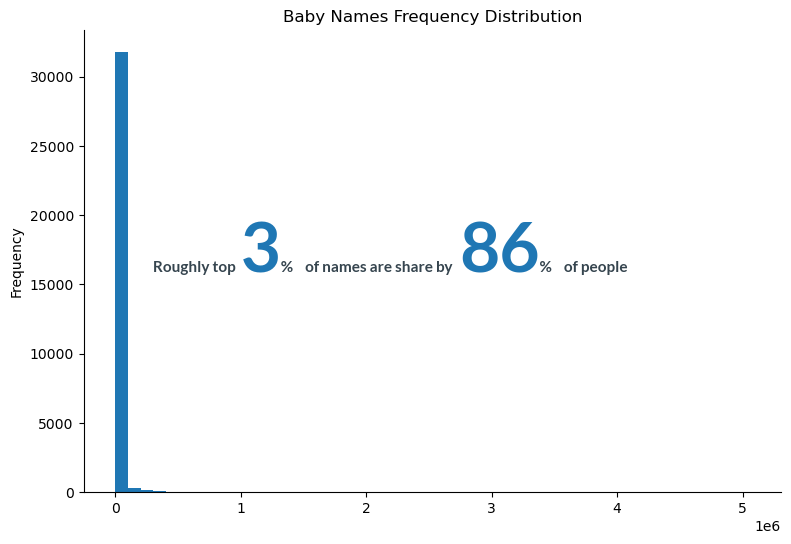

In [267]:
# Transform data
data = df.groupby("Name").Births.sum()

# Plot
ax = data.plot.hist(figsize=(9,6),bins=50,title="Baby Names Frequency Distribution")
sns.despine()

# Annotate
x = ax.patches[0].get_width() +0.2e6
y = ax.patches[0].get_height() /2

text ="Roughly top               %    of names are share by\
                             %    of people "
plt.text(x,y,text,fontdict=font ,color ="#36454F")

text = f"{int(round((1000/len(data)),2)*100)}"
plt.text(x*3.3,y,text,fontdict=font,size=50,color="#1f77b4")

text = f"{int((data.nlargest(1000).sum()/data.sum()).round(2)*100)}"
plt.text(x*9.1,y,text,fontdict=font,size=50,color = "#1f77b4")

## Baby Names and the <span style="color: #ff6347;">Power Law Distribution</span>
The power law distribution is a function of the form $f(x) \sim x^{-\alpha}$, where $x$ is the variable and $\alpha$ is the scaling parameter.

Baby names and power law distribution are closely related. Power law distribution is a statistical distribution where the frequency of an event is inversely proportional to its magnitude. In the context of baby names, this means that a few names occur very frequently, while the majority of names occur infrequently.

This pattern is known as the <span style="color: #ad2141;"> <b >Matthew effect"</b></span>, where the popular names become even more popular over time, while the less popular names continue to decline in popularity. This effect is driven by social influence and cultural trends, which can amplify the initial differences in popularity between names.

----
<li>To confirm the power-law hypothesis we need to compare the <em>probability denstiy functions (PDF)</em> <br/><br/>
The PDF of a real-world dataset is usually not known beforehand, so we need to estimate it from the data.One way to do this is to calculate the empirical PDF, which estimates the probability density of the data by counting the number of data points that fall within small intervals or "bins" along the range of the data.

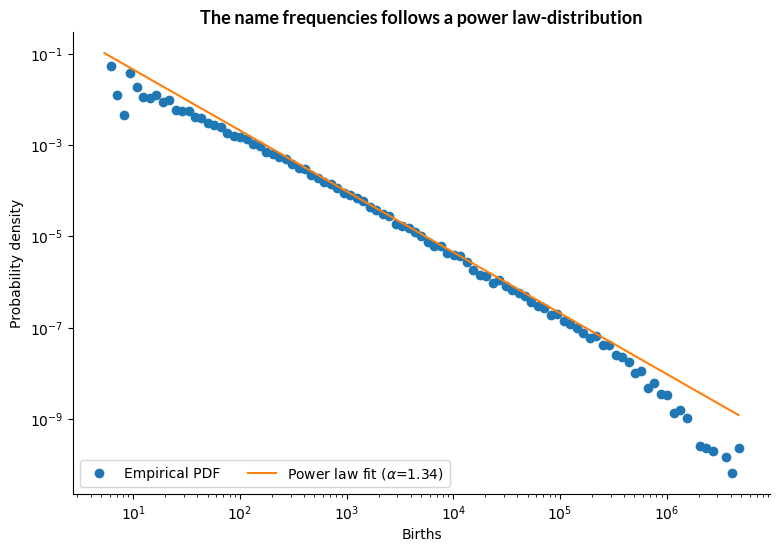

In [268]:
# Creates 50 logarithmically spaced bins between the minimum and the maximum values of the data. 
# This ensures that the bins are equally spaced on a logarithmic scale, which is important for analyzing power law distributions.

bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 100)
counts, edges = np.histogram(data, bins=bins, density=True)
x = (edges[:-1] + edges[1:]) / 2

# plot the empirical PDF
plt.figure(figsize=(9,6))
plt.plot(x, counts, 'o', label='Empirical PDF')



# This formula is derived from the log-likelihood function for a power law distribution, which is given by:

# log_likelihood = -n * np.log(alpha) - (1 + alpha) * np.sum(np.log(data / xmin))

# where n is the number of observations in the data, alpha is the scaling parameter to be estimated, data is the dataset,
# and xmin is the minimum value at which the power law behavior starts.

# The formula alpha = 1 + len(data) / np.sum(np.log(data / data.min())) is obtained by setting the derivative
# of the log-likelihood function with respect to alpha equal to zero and solving for alpha.

# fit the data to a power law distribution
alpha = 1 + len(data) / np.sum(np.log(data / data.min()))
y = x ** -alpha
plt.plot(x, y, label=f'Power law fit ($\\alpha$={alpha:.2f})',)

# set plot properties
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Births')
plt.ylabel('Probability density')
plt.legend(loc=3,ncol=2)
sns.despine()


if alpha > 1:
    plt.title("The name frequencies follows a power law-distribution",fontdict=font,size=13)
else:
    plt.title("The name frequencies don't follow a power-law distribution")

# US Birth Rate Analysis

## Overall Birth Trend

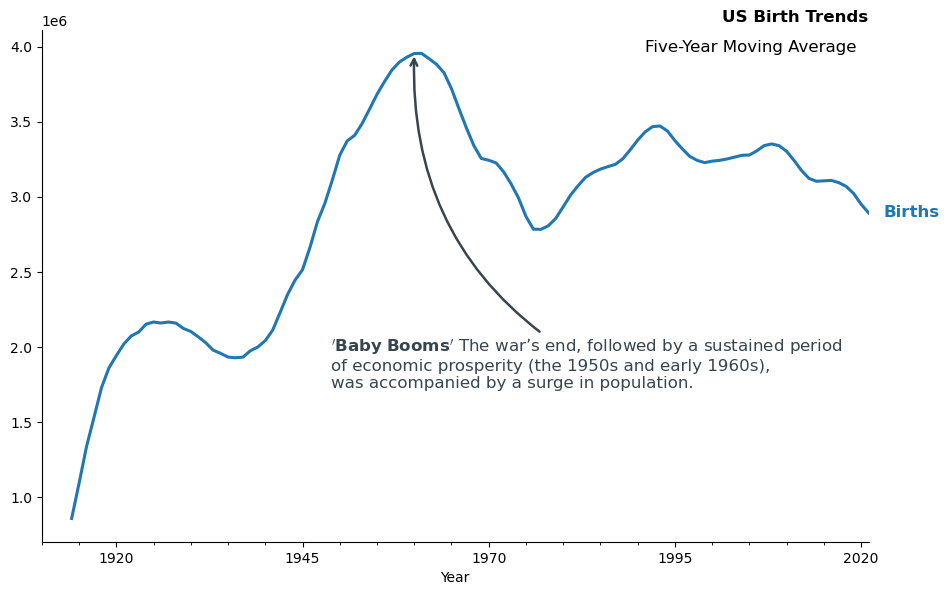

In [269]:
# Transform Data - 5 year moving average to analyize the trend
rolling_mean = df.groupby("Year").sum().rolling(5).mean()

# Plot
ax=rolling_mean.plot(figsize=(9,6),lw=2.2)
sns.despine()
plt.legend().remove()
plt.tight_layout()

# Annotate
plt.text(21,rolling_mean.iloc[-1]+1.1e6, "Five-Year Moving Average",va="center",size=12)
plt.text(53,rolling_mean.iloc[-1], "Births",color = "#1f77b4",weight="bold",va="center",size=12)
plt.title("US Birth Trends", loc='right',weight="bold")

ax.annotate(r"$\bf{'Baby^ Booms'}$"+
    " The war’s end, followed by a sustained period \n\
of economic prosperity (the 1950s and early 1960s),\n\
was accompanied by a surge in population.",
            xy=(-10,rolling_mean.max()), xycoords='data', size=12,color ="#36454F",
            xytext=(0.35,0.3), textcoords='axes fraction', ha='left',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.3",lw=1.8,color ="#36454F"));


## States Ranking
ranking for total birhts each decade

In [270]:
ranked=df.groupby(["State",pd.Grouper(key="Year",freq="10Y")]).Births.sum().unstack(0).rank(axis=1)
ranked

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Columbia,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1910-12-31,45.0,2.0,7.0,33.0,29.0,19.0,12.0,21.0,5.0,23.0,...,16.0,40.0,49.0,11.0,6.0,41.0,20.0,26.0,30.0,3.0
1920-12-31,40.0,1.0,8.0,27.0,34.0,19.0,7.0,24.0,4.0,21.0,...,16.0,37.0,47.0,12.0,6.0,38.0,20.0,26.0,35.0,3.0
1930-12-31,39.0,1.0,10.0,27.0,44.0,19.0,8.0,22.0,3.0,23.0,...,16.0,37.0,48.0,13.0,5.0,35.0,20.0,26.0,34.0,4.0
1940-12-31,41.0,1.0,10.0,27.0,46.0,19.0,12.0,20.0,3.0,24.0,...,14.0,38.0,49.0,13.0,5.0,34.0,22.0,26.0,35.0,4.0
1950-12-31,38.0,1.0,14.0,24.0,49.0,19.0,17.0,22.0,4.0,28.0,...,10.0,37.0,48.0,15.0,5.0,35.0,25.0,26.0,36.0,3.0
1960-12-31,32.0,2.0,16.0,21.0,50.0,20.0,17.0,25.0,5.0,37.0,...,11.0,34.0,48.0,14.0,4.0,36.0,28.0,22.0,38.0,3.0
1970-12-31,32.0,2.0,19.0,21.0,51.0,23.0,16.0,26.0,5.0,42.0,...,10.0,34.0,49.0,15.0,4.0,36.0,29.0,18.0,37.0,1.0
1980-12-31,31.0,3.0,23.0,18.0,51.0,25.0,14.0,22.0,4.0,44.0,...,6.0,35.0,49.0,20.0,2.0,37.0,30.0,17.0,36.0,1.0
1990-12-31,29.0,4.0,30.0,18.0,51.0,27.0,14.0,24.0,3.0,45.0,...,5.0,34.0,50.0,19.0,2.0,38.0,33.0,16.0,36.0,1.0


## Noticable State Birth Rate Changes Throughout the Years

### Top 5

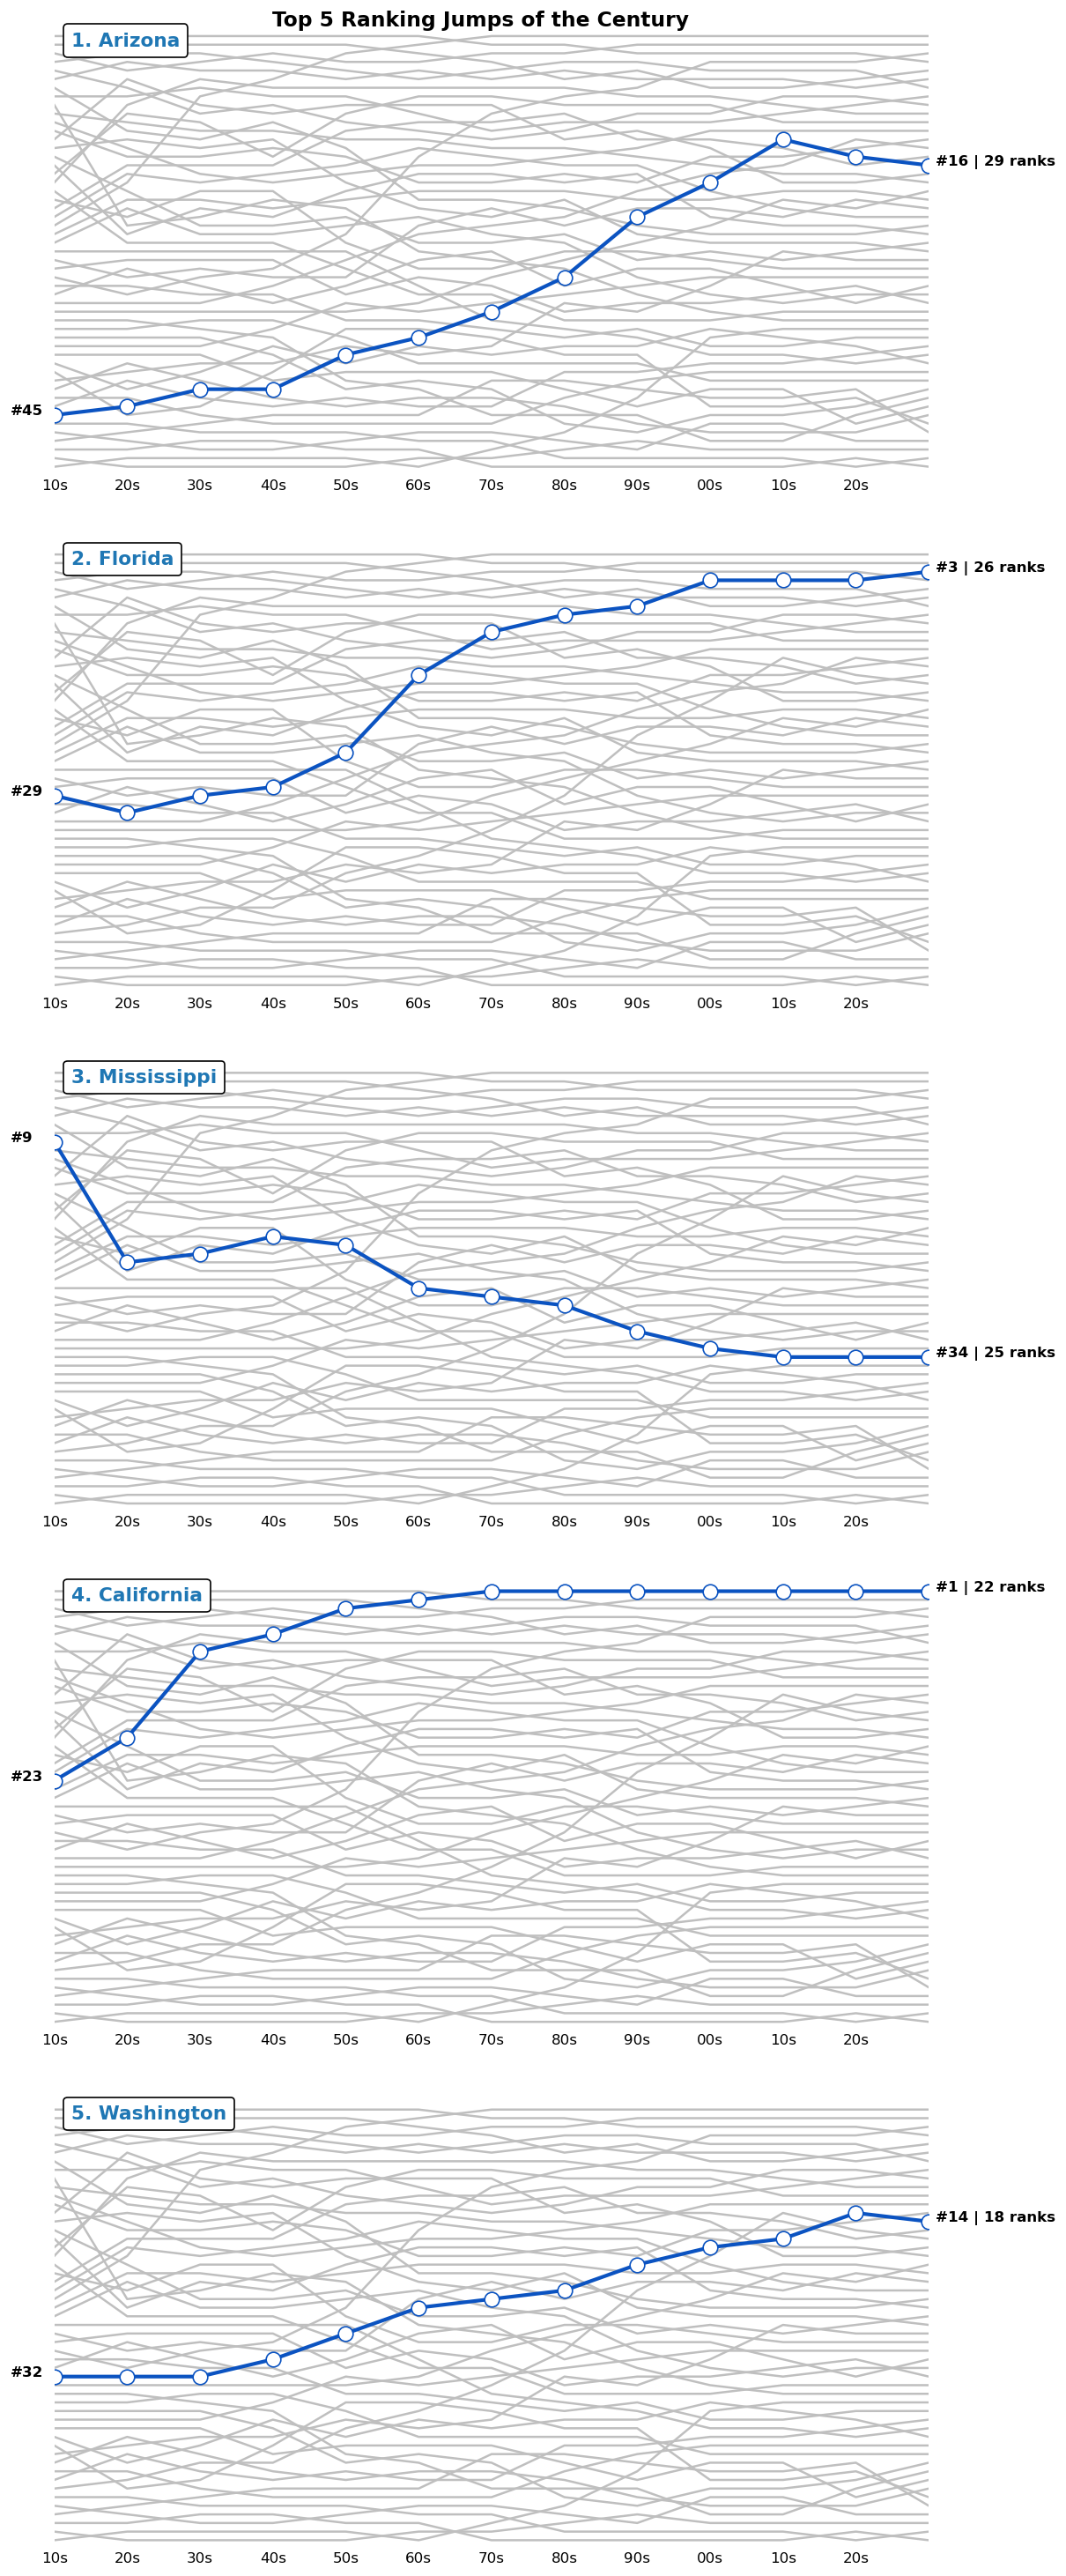

In [271]:
# Transform Data - Identify the state that has experienced the greatest number of rank change
n = ranked.apply(lambda x: x[0]-x[-1]).abs().nlargest(5)

# Create a figure with subplots
fig, axes = plt.subplots(len(n), 1, figsize=(9, 5*len(n)), sharey=True, dpi=120)
fig.suptitle('Top 5 Ranking Jumps of the Century', fontsize=14,weight="bold")
plt.tight_layout()


# Iterate over each state and plot the graph in the corresponding subplot
for i, (idx, data) in enumerate(n.iteritems()):
    ax = axes[i]
    ranked[idx].plot(ax=ax, label=idx, color='#0b53c1',xlabel="",marker='o',
                     markersize=10, markerfacecolor='white',zorder=60, linewidth=2.5)
    ranked.drop(idx, axis=1).plot(ax=ax, color='#BFBFBF',xlabel="",zorder=3)
    
    
    ax.legend().remove()
    sns.despine(ax=ax)
    ax.set_yticks([])
    ax.set_xticks(list(range(-60, 65, 10)))
    ax.set_xticklabels(["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "00s", "10s", "20s", ""])
    ax.tick_params(bottom=False, which='both', pad=-10, labelleft=False)
    ax.set_frame_on(False)
    
    
    y1 = ranked[idx].iloc[0]
    y2 = ranked[idx].iloc[-1]
    ax.text(-66, y1, "#" + str(int(52-y1)),weight="bold")
    ax.text(61, y2, "#" + str(int(52-y2)) + f' | {int(data)} ranks',weight="bold")
    at = AnchoredText(str(i+1) + ". " + idx, prop=dict(size=13, color="#1f77b4",
                                                       weight="bold"), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)



### All Rankings Birds-Eye View

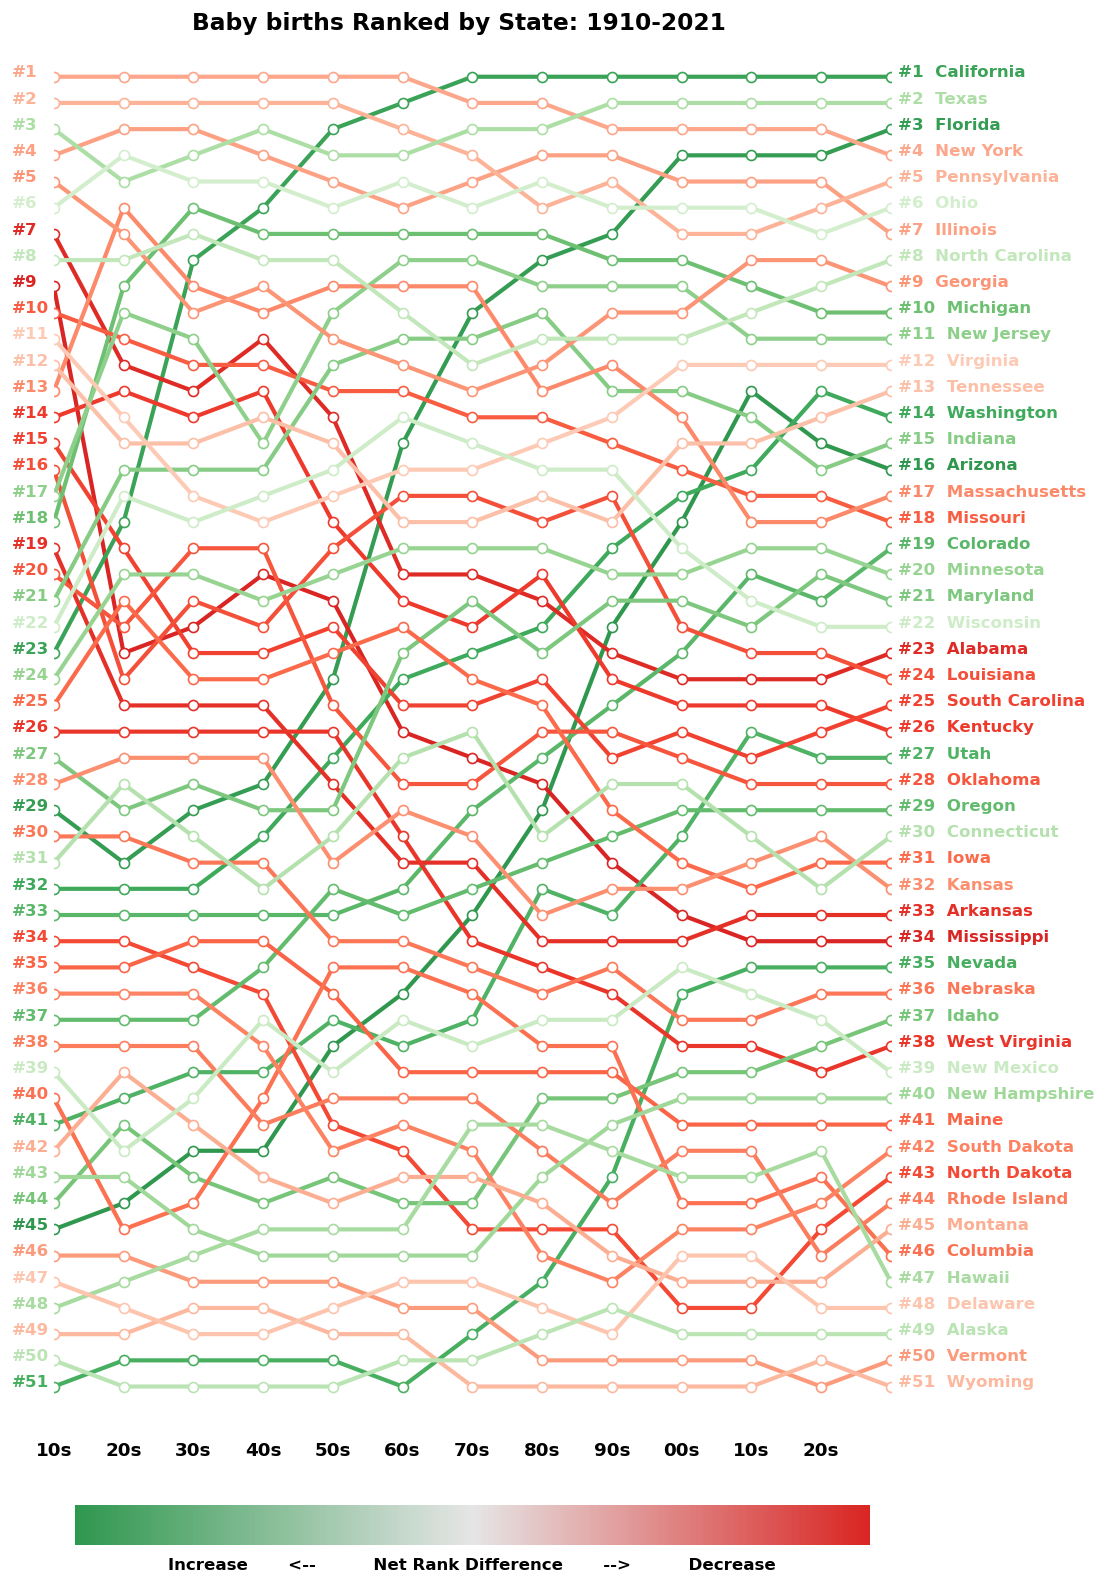

In [272]:
# Transform Data
n = ranked.apply(lambda x: x[0]-x[-1]).abs().nlargest(51)

# Create a figure with subplots
fig, axes = plt.subplots(1, 1, figsize=(9, 0.33*len(n)), sharey=True, dpi=120)
fig.suptitle('Baby births Ranked by State: 1910-2021', fontsize=14,weight="bold")
plt.subplots_adjust(top=0.98)
# plt.title('(Greens) End up ranking higher than where they started', fontsize=12,color="#2E8B57")
j,k =0,0

# Iterate over each state and plot the graph in the corresponding subplot
for i, (idx, data) in enumerate(n.iteritems()):
    ax = axes
    start_rank = 52-ranked[idx].iloc[0]
    final_rank = 52 - ranked[idx].iloc[-1]
    if final_rank <= start_rank:
        color = plt.cm.Greens_r(np.linspace(0.3,0.8,23))[j]
        j+=1
    else:

        color = plt.cm.Reds_r( np.linspace(0.3,0.8,28))[k]
        k+=1
    ranked[idx].plot(ax=ax, label=idx, color=color, xlabel="", marker='o',
                     markersize=6, markerfacecolor='white', zorder=60, linewidth=2.5)

    
    
    ax.legend().remove()
    sns.despine(ax=ax)
    ax.set_yticks([])
    ax.set_xticks(list(range(-60, 65, 10)))
    ax.set_xticklabels(["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "00s", "10s", "20s", ""],
                       weight="bold",size=11)
    ax.tick_params(bottom=False, which='both', pad=-10, labelleft=False)
    ax.set_frame_on(False)
    
    
    y1 = ranked[idx].iloc[0]
    y2 = ranked[idx].iloc[-1]
    ax.text(-66, y1, "#" + str(int(52-y1)),weight="bold",color=color)
    ax.text(61, y2, "#" + str(int(52-y2))+f"  {idx}",weight="bold",color=color)
    
colors_list = [(0.182, 0.593, 0.306), (0.9, 0.9, 0.9),(0.850, 0.146, 0.136)]

# Create a colormap and norm for the colorbar
cmap = colors.LinearSegmentedColormap.from_list('', colors_list)
norm = colors.Normalize(vmin=0, vmax=1)

# Create the colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),orientation="horizontal",shrink=0.95,pad=0.03)
cbar.set_ticks([])
cbar.set_label('Increase       <--          Net Rank Difference       -->          Decrease',weight="bold")
cbar.outline.set_visible(False)
# plt.tight_layout()

## Overall Top 5 States with highest Births

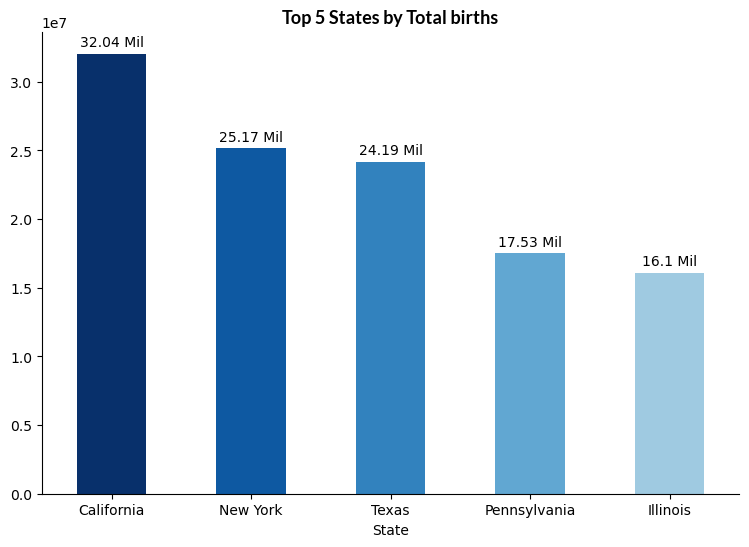

In [273]:
data = df.groupby('State').Births.sum().nlargest(5)
# Define the number of colors needed
num_colors = 5

# Generate a color map
cmap = plt.get_cmap('Blues_r')

ax = data.plot.bar(color =[cmap(i*40) for i in range(num_colors)],figsize=(9,6))
sns.despine()

plt.title("Top 5 States by Total births",fontdict=font,size=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for bar in ax.patches:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5e6,str(round(bar.get_height()/1000000,2))+" Mil",ha="center")